In [1]:
!pip install wordcloud
!pip install Sastrawi

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
import nlp_id
import joblib
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

In [3]:
# Membaca dataset dari file CSV
df = pd.read_csv('data.csv')

# Menampilkan nama-nama kolom dalam DataFrame
print(df.columns)

Index(['Unnamed: 0', 'Username', 'Link', 'Text', 'Human', 'Date'], dtype='object')


Lima baris pertama dari dataset:
   Unnamed: 0           Username                                       Link  \
0         NaN         ridone_337         https://www.tiktok.com/@ridone_337   
1         NaN  dagosputrabenawas  https://www.tiktok.com/@dagosputrabenawas   
2         NaN       athar_alenxi       https://www.tiktok.com/@athar_alenxi   
3         NaN           gustut85           https://www.tiktok.com/@gustut85   
4         NaN        jodohmu2959        https://www.tiktok.com/@jodohmu2959   

                                                Text    Human        Date  
0  saya beli parfum side effect saking enak nya d...  Positif  2024-02-25  
1  tahan nya dua hari saya sudah beli ka maka nya...  Positif  2024-02-25  
2                 buat olahraga makai varian apa ka?   Netral  2024-02-25  
3  yakin ga wangi nya tahan dua belas jam,kalau g...  Negatif  2024-02-25  
4  pernah make punya temen. Emang enak banget har...  Positif  2024-02-25  


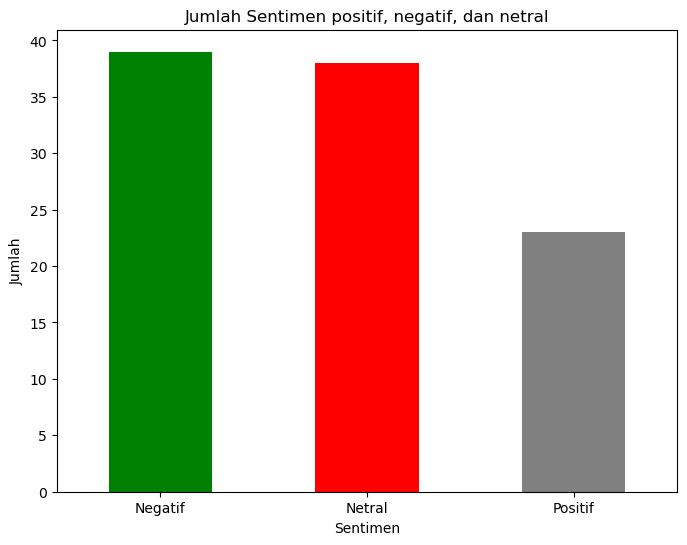

In [4]:
# Membaca dataset
data = pd.read_csv('data.csv')  # Ganti 'nama_file.csv' dengan nama file dataset Anda

# Menampilkan lima baris pertama dari dataset
print("Lima baris pertama dari dataset:")
print(data.head())

# Menampilkan jumlah entri dengan sentimen negatif, netral, dan positif
sentimen_count = data['Human'].value_counts()

# Membuat plot diagram batang
plt.figure(figsize=(8, 6))
sentimen_count.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Jumlah Sentimen positif, negatif, dan netral')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [5]:
# Menghitung jumlah sentimen positif, netral, dan negatif
positif_count = (data['Human'] == 'Positif').sum()
netral_count = (data['Human'] == 'Netral').sum()
negatif_count = (data['Human'] == 'Negatif').sum()

# Menampilkan jumlah sentimen positif, netral, dan negatif
print("Jumlah Sentimen Positif:", positif_count)
print("Jumlah Sentimen Netral:", netral_count)
print("Jumlah Sentimen Negatif:", negatif_count)

Jumlah Sentimen Positif: 23
Jumlah Sentimen Netral: 38
Jumlah Sentimen Negatif: 39


In [6]:
# Membaca data dari file CSV
df = pd.read_csv("data.csv")

# PROSES CLEANSING DATA
# Membersihkan data kolom 'Human' dari karakter yang tidak diinginkan
def clean_text(text):
    # Contoh: Menghilangkan tanda baca dan mengubah teks menjadi huruf kecil
    text = text.replace(",", "")
    text = text.replace(".", "")
    text = text.replace("!", "")
    text = text.replace("?", "")
    text = text.replace("@", "")
    text = text.replace("#", "")
    # Lanjutkan sesuai kebutuhan membersihkan teks
    
    return text

# Memanggil fungsi clean_text untuk membersihkan kolom 'Human'
df['Text'] = df['Text'].apply(clean_text)

# PROSES CASE FOLDING
# Proses case folding pada kolom 'Human'
df['Text'] = df['Text'].str.lower()

# PROSES Stopword

# Inisialisasi stemmer Sastrawi
stemmer = StemmerFactory().create_stemmer()

# Fungsi untuk stemming dengan Sastrawi
def stemming(text):
    return stemmer.stem(text)

df['Text'] = df['Text'].apply(stemming)

# Inisialisasi stopword remover Sastrawi
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()

# Fungsi untuk menghapus stopword dengan Sastrawi
def remove_stopwords(text):
    return stopword_remover.remove(text)

df['Text'] = df['Text'].apply(remove_stopwords)


# PROSES Stemming

# Inisialisasi stemmer bahasa Inggris
stemmer = PorterStemmer()

# Fungsi untuk melakukan stemming pada teks
def stemming(text):
    words = text.split()  # Memisahkan teks menjadi kata-kata
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Memanggil fungsi stemming untuk melakukan stemming pada kolom 'Human'
df['Text'] = df['Text'].apply(stemming)

# PROSES Tokenizing

# Fungsi untuk melakukan tokenisasi pada teks
def tokenize(text):
    tokens = word_tokenize(text)  # Melakukan tokenisasi kata
    return tokens

# Memanggil fungsi tokenize untuk melakukan tokenisasi pada kolom 'Human'
df['Text'] = df['Text'].apply(tokenize)


# Menampilkan hasil setelah membersihkan data
print(df['Text'])

0     [beli, parfum, side, effect, sake, enak, nya, ...
1     [tahan, nya, hari, sudah, beli, ka, nya, beran...
2                     [buat, olahraga, varian, apa, ka]
3     [yakin, ga, wangi, nya, tahan, bela, jamkalau,...
4     [pernah, make, punya, temen, emang, enak, bang...
                            ...                        
95    [saran, wangi, kaya, abi, mandi, buat, anak, s...
96                  [ratu, mil, berapa, harga, nya, ka]
97    [pasti, nya, pakai, domin, bikin, pasang, maki...
98                [mau, nanya, ka, yang, wangi, vanila]
99                [mau, dong, parfum, lokal, enak, kak]
Name: Text, Length: 100, dtype: object


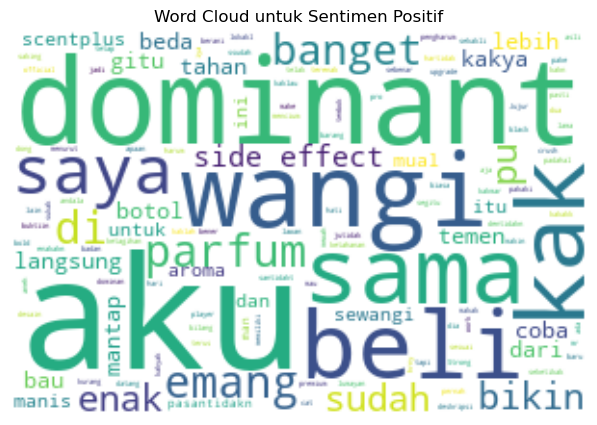

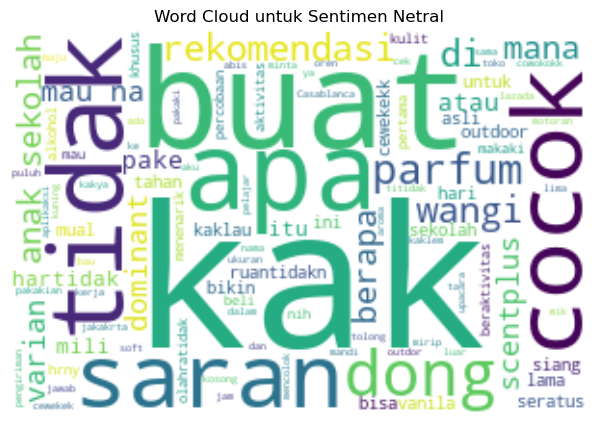

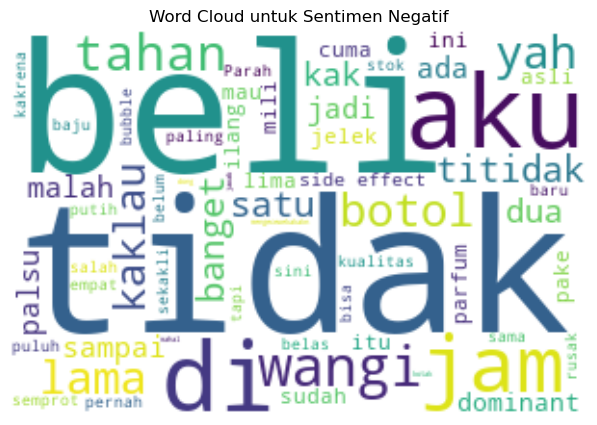

In [7]:
# Membaca dataset dari file CSV
df = pd.read_csv('data.csv')

stopword = {
    "yang": "",
    "nya": "",
    "kok": "",
    "sih": "",
    "ga": "tidak",
    "gak": "tidak",
    "tidakk": "tidak",
    "udah": "sudah",
    "ka": "kak",
    "kakk": "kak",
    "cewe": "cewek",
    "cew": "cewek",
    "cowo": "cowok",
    "cow": "cowok",
}

def normalize_text(text, stopword):
    for word, replacement in stopword.items():
        text = text.replace(word, replacement)
    return text

df['Text'] = df['Text'].apply(lambda x: normalize_text(x, stopword))

# Membuat word cloud untuk setiap sentimen
for sentiment in df['Human'].unique():
    # Menggabungkan semua teks dalam kolom 'Text' berdasarkan sentimen
    text = ' '.join(df[df['Human'] == sentiment]['Text'])
    
    # Membuat objek WordCloud
    wordcloud = WordCloud(width=300, height=200, background_color='white').generate(text)
    
    # Menampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud untuk Sentimen {sentiment}')
    plt.axis('off')
    plt.show()

In [8]:
# PROSES Pembobotan Dan Pembagian Data Training Dan Data Testing Menggunakan TF-IDF

# Membaca data dari file CSV
df = pd.read_csv("data.csv")

# Memisahkan fitur (X) dan label (y)
X = df['Text']
y = df['Human']

# Memisahkan data menjadi data pelatihan (training) dan data pengujian (testing) dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi objek TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan pembelajaran (fitting) dan transformasi pada data pelatihan
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Melakukan transformasi pada data pengujian
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Menampilkan dimensi dari matriks TF-IDF
print("Dimensi matriks TF-IDF untuk data pelatihan:", X_train_tfidf.shape)
print("Dimensi matriks TF-IDF untuk data pengujian:", X_test_tfidf.shape)

Dimensi matriks TF-IDF untuk data pelatihan: (80, 260)
Dimensi matriks TF-IDF untuk data pengujian: (20, 260)


In [9]:
# Inisialisasi model regresi logistik multinomial
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Melatih model regresi logistik menggunakan data pelatihan dan labelnya
logreg_model.fit(X_train_tfidf, y_train)

# Memprediksi label untuk data pengujian
y_pred = logreg_model.predict(X_test_tfidf)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Memprediksi label untuk data pengujian
y_pred = logreg_model.predict(X_test_tfidf)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model regresi logistik multinomial:", accuracy)

# Menghitung presisi prediksi
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print("Presisi model regresi logistik multinomial:", precision)

# Menghitung recall prediksi
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
print("Recall model regresi logistik multinomial:", recall)

Akurasi model regresi logistik multinomial: 0.7
Presisi model regresi logistik multinomial: 0.7895833333333334
Recall model regresi logistik multinomial: 0.7


In [11]:
# Simpan model ke dalam file
joblib.dump(logreg_model, "model100.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

# Output pesan konfirmasi
print("Model berhasil disimpan dalam file 'model100.pkl'.")

Model berhasil disimpan dalam file 'model100.pkl'.


In [12]:
# Load model yang sudah dilatih
logreg_model = joblib.load("model100.pkl")

# Fungsi untuk melakukan klasifikasi teks
def classify_text(input_text):
    # Membersihkan teks input
    cleaned_text = clean_text(input_text)
    # Mengubah teks input menjadi vektor fitur menggunakan TF-IDF
    input_vector = tfidf_vectorizer.transform([cleaned_text])
    # Melakukan prediksi menggunakan model
    predicted_label = logreg_model.predict(input_vector)[0]
    if predicted_label == 'Positif':
        return "Kalimat termasuk dalam kategori: Positif"
    elif predicted_label == 'Negatif':
        return "Kalimat termasuk dalam kategori: Negatif"
    else:
        return "Kalimat termasuk dalam kategori: Netral"

# Contoh penggunaan
input_text = "nyesel beli parfum ini kebanyakan alkohol bau nya tidak enak"
result = classify_text(input_text)
print(result)

Kalimat termasuk dalam kategori: Negatif
